<a href="https://colab.research.google.com/github/kumarpt20231231/kumarpt20231231/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab to mount the file if running data from own drive and not run time drive
# from google.colab import drive
 drive.mount('/content/drive')
# I comented this out as I used a run time folder in the library for the csv file insted of my personel google drive

IndentationError: unexpected indent (<ipython-input-5-fb6fd622c596>, line 3)

In [ ]:
# read the data from the CSV file using panda read_csv() function to create a dataframe named df
df = pd.read_csv('/content/My Data/foodhub_order.csv')
# Check the data structure  by using head() function which returns the first 5 rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/My Data/foodhub_order.csv'

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [ ]:
# Use info() function to understand the data frame and its content The . info() method allows us to learn the shape of object types of our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB



**Observations : **
1.   We see that the table contains 1898 non null values
2.   The Columns of the table are
*   Order_id, customer_id, food_preperation_time and delivery_time are of the type integer
*   restarunt_name, cusine_type, day_of_the_week, rating are of the type objects
*   cost_of_the_order is ofthe type float

**Notes to self**

Might be usefull to convert  

*   food_preperation_time and delivery_time into a datatime tyoe for analysis
*   day_of_the_week into a dattime type for analysis
*   Apply a catogory on to ratings like a likerts scale bases of the values























In [ ]:
#Use the describe() functon with Include = all method gives us summary statistics for numerical columns in our DataFrame
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


In [ ]:
# Ran a correlation analysis to understand the relationship betwen columns in the dataframe to use later in Univariate / bi-variate analysis
df.corr()

<ipython-input-197-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
#Use the len() function obtain the number of rows and colums of a DataFrame, this will return rows and colums
print("Number of Rows:", len(df))
print("Number of Columns:", len(df.columns))

Number of Rows: 1898
Number of Columns: 9


#### Observations:

*   We see that the table contains 1898 non null values im the rows
*   We see 9 columns in the data frame

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use the info() function to get the different columns in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The Columns of the table are

1.   Order_id, customer_id, food_preperation_time and delivery_time are of the type integer
2.   restarunt_name, cusine_type, day_of_the_week, rating are of the type objects
3.   cost_of_the_order is ofthe type float

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# To check for null values in a pandas DataFrame, we can use the isnull() method. The isnull() method returns a DataFrame of the same shape as the input DataFrame, but with boolean values indicating whether each cell is null. Include this with sum() toget the count of null values
null_count = df.isnull().sum()
# print the number of null values
print('Number of null values:', null_count)
# print the number of NaN values
na_count = df.isna().sum()
print('Number of NaN values:', na_count)

Number of null values: order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
Number of NaN values: order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
 We see that there is no null values in any of the columns in the loaded CSV

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Define a funcrion to return min, max and average value , use the data frame describe() to descriptive statistics and useth min, max and avg to get the values. I wanted to make it more generic using a function definition
column_name = 'food_preparation_time'  # ypu can change this to any of the columns with numerica value to get the stats
column_stats = df[column_name].describe()

min_value = column_stats['min']
max_value = column_stats['max']
avg_value = column_stats['mean']

print(f"Minimum value of column '{column_name}': {min_value}")
print(f"Maximum value of column '{column_name}': {max_value}")
print(f"Average value of column '{column_name}': {avg_value}")

Minimum value of column 'food_preparation_time': 20.0
Maximum value of column 'food_preparation_time': 35.0
Average value of column 'food_preparation_time': 27.371970495258168


#### Observations:
Food takes at the minimum of 20 mins to prepare with the max time taken being 35 mins , giving us a average over the whole set of 1897 rows to be 27.37 mins

### **Question 5:** How many orders are not rated?

In [ ]:
#Use the value_count() function with comparision operator and .sum function to classify rating and do some analysis of the rating and bucket them. The value_counts() method is a convenient way to count the number of occurrences of each unique value in a pandas Series or DataFrame column
# Use the assignement operator = to assign the cumputed value to variables
# Please note '==' and '!=' are comparision operators and '=' is the assignment operator
# .sum() function return the total sum of the value count of the data in the variable
not_rated = df[df.rating == 'Not given']['rating'].value_counts()
rated = df[df.rating != 'Not given']['rating'].value_counts()
rated_5 = df[df.rating == '5']['rating'].value_counts()
rated_4 = df[df.rating == '4']['rating'].value_counts()
rated_3 = df[df.rating == '3']['rating'].value_counts()
rated_2 = df[df.rating == '2']['rating'].value_counts()
rated_1 = df[df.rating == '1']['rating'].value_counts()
rated_0 = df[df.rating == '0']['rating'].value_counts()
total_orders = df['rating'].value_counts()
# Print the results
print(f"Number of orders not rated: {not_rated.sum()}")
print(f"Number of orders rated: {rated.sum()}")
print(f"Number of orders rated 5: {rated_5.sum()}")
print(f"Number of orders rated 4: {rated_4.sum()}")
print(f"Number of orders rated 3: {rated_3.sum()}")
print(f"Number of orders rated 2: {rated_2.sum()}")
print(f"Number of orders rated 1: {rated_1.sum()}")
print(f"Number of orders rated 0: {rated_0.sum()}")
print(f"Total number of orders: {total_orders.sum()}")
print(f"Percentage of orders not rated: {round((not_rated.sum() / total_orders.sum()) * 100, 2)}%")
print(f"Percentage of orders rated: {round((rated.sum() / total_orders.sum()) * 100, 2)}%")
print(f"Percentage of orders rated 5: {round((rated_5.sum() / total_orders.sum()) * 100, 2)}%")
print(f"Percentage of orders rated 4: {round((rated_4.sum() / total_orders.sum()) * 100, 2)}%")
print(f"Percentage of orders rated 3: {round((rated_3.sum() / total_orders.sum()) * 100, 2)}%")
print(f"Percentage of orders rated 2: {round((rated_2.sum() / total_orders.sum()) * 100, 2)}%")
print(f"Percentage of orders rated 1: {round((rated_1.sum() / total_orders.sum()) * 100, 2)}%")
print(f"Percentage of orders rated 0: {round((rated_0.sum() / total_orders.sum()) * 100, 2)}%")

Number of orders not rated: 736
Number of orders rated: 1162
Number of orders rated 5: 588
Number of orders rated 4: 386
Number of orders rated 3: 188
Number of orders rated 2: 0
Number of orders rated 1: 0
Number of orders rated 0: 0
Total number of orders: 1898
Percentage of orders not rated: 38.78%
Percentage of orders rated: 61.22%
Percentage of orders rated 5: 30.98%
Percentage of orders rated 4: 20.34%
Percentage of orders rated 3: 9.91%
Percentage of orders rated 2: 0.0%
Percentage of orders rated 1: 0.0%
Percentage of orders rated 0: 0.0%


#### Observations:


1.   We see that 736 orders are marked as "Not given" indicating that ~ 39% of the customers did not rate the order , either did not want to or was not reminded to rate , or there was no adequate incentives to make them spend time to rate. It also could be rating of the order process was not simple or time consuming
2.   We also see that rating were provided for 1162 orders and they were either a 5 , 4 or a 3
3.  About 588 orders or ~ 31% was rated at 5 , 386 orders or ~20% was rated 4 and less than 188 orders or ~< 10% were rated 3
4.  there seems to be no rateings for 2, 3 , 1
5. Given the amout of "Not given" at ~40%  , it may not be advisable to replace "Not given" by a computed or assumed value of rating

##### Note to self

Might have made it easy to have converted this colum "Rated " into numeric.  not sure what to put in value for "Non Given" shown the above data distribution





### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
plt.figure(figsize = (200,75))
sns.countplot(data = df, x = 'customer_id')

<Axes: xlabel='customer_id', ylabel='count'>

In [ ]:
unique_customers = df['customer_id'].nunique()
orders_by_unique_customers = df['customer_id'].value_counts().unique()
print(f"Unique Customers of Food Hub :{unique_customers}")
print(f"Orders counts by Unique Customers range: {orders_by_unique_customers}")

Unique Customers of Food Hub :1200
Orders counts by Unique Customers range: [13 10  9  8  7  6  5  4  3  2  1]


####Observations:

*   There is a total of 1200 unique FoodHub customers.
*   The unique customers placed orders in the ramge of 1 - 13.



<Axes: xlabel='restaurant_name', ylabel='count'>

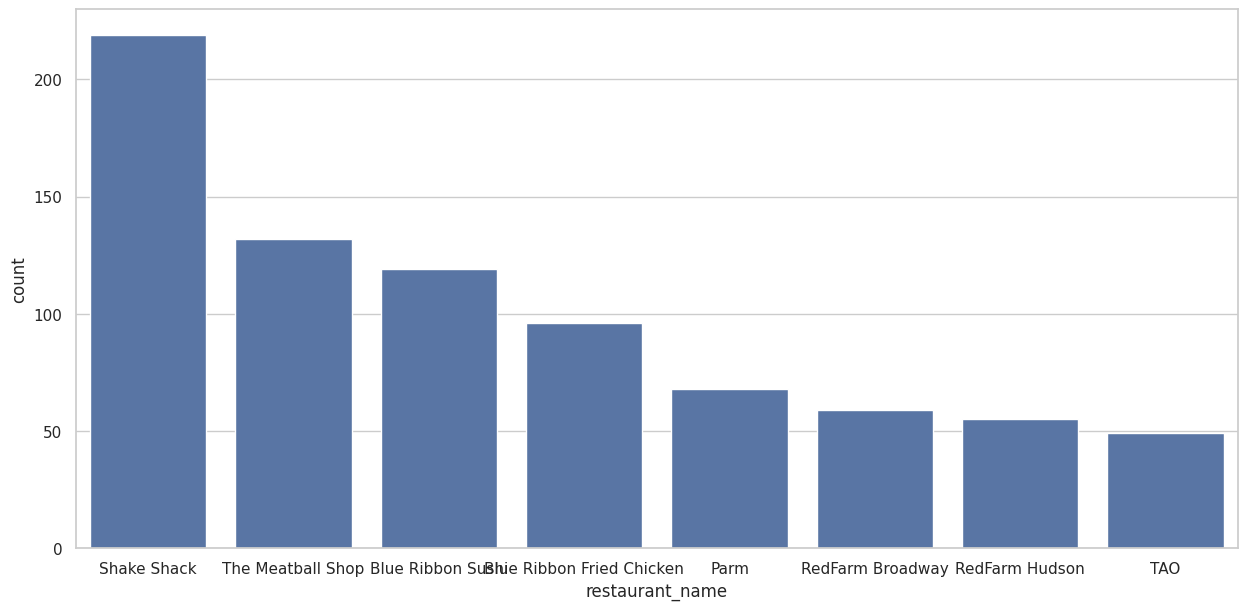

In [ ]:
plt.subplots(figsize = (15,7))
sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:8].index)

####Observations:
The top restaurant is Shake Shack with over 200 orders placed. Followed by ,The Meatball Shop , Blue Ribbon Sushi , Blue Ribbon Fried Chicken and Parm


In [ ]:
array = df['customer_id'].value_counts()
array1 = pd.DataFrame(array)
array1.value_counts()

NameError: name 'df' is not defined

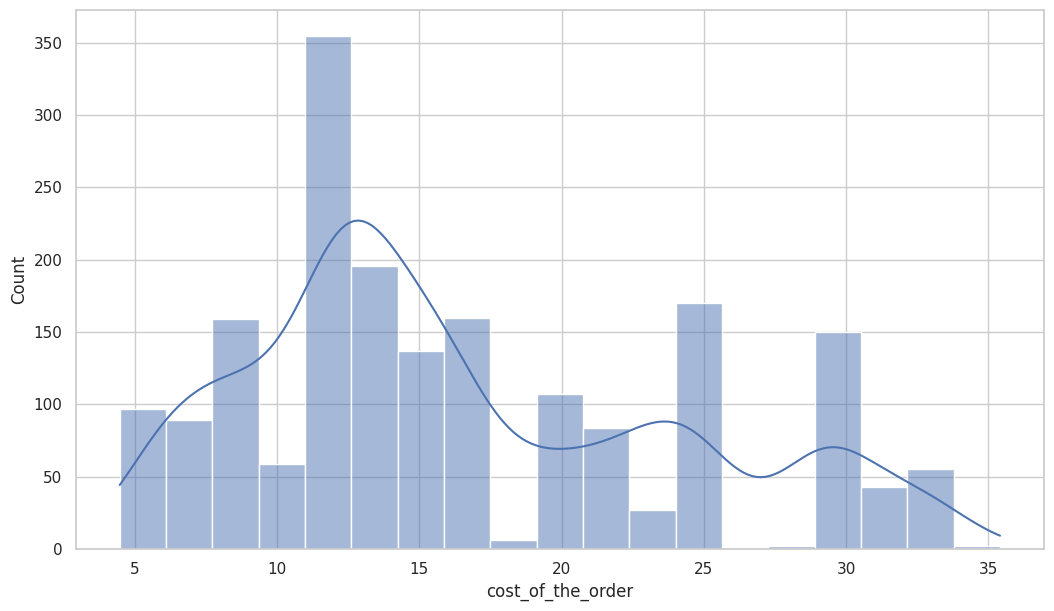

<Figure size 1170x827 with 0 Axes>

In [ ]:
# Let us start with a Histogram Plot on the cost of the order
sns.set_style("whitegrid")
sns.histplot(x=df['cost_of_the_order'],kde = True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.tight_layout()
plt.show()
plt.savefig('cost_of_order_hist.png');


####Observations:

*   We see this is a Right Skewed Histogram with most orders being under 20.00.
*   We do see a size able chunk of orders in the 30 through 35 per oder






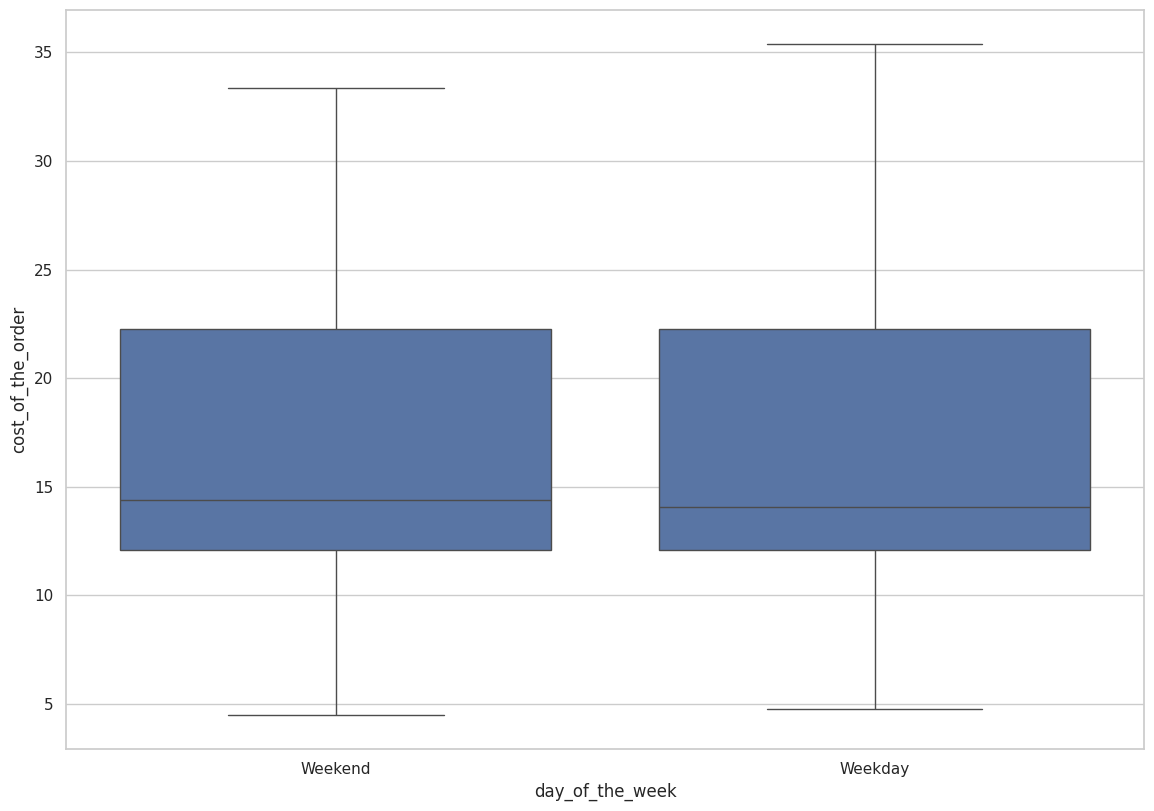

<Figure size 1170x827 with 0 Axes>

In [ ]:
# Let us do a box plot on cost of the order vs the day of the week
sns.set_style("whitegrid")
sns.boxplot(x=df['day_of_the_week'] , y= df['cost_of_the_order'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.tight_layout()
plt.show()
plt.savefig('cost_of_order_box.png');

####Observations:

The Median of the order cost is around ~ 14.14 minimum cost is around ~ 4.50 and maximum cost is around ~ 35.40.


In [ ]:
#Calculate the Min , Max and Median Cost to validate our graphical observation for the histogram and box plot above
mid_cost = df.cost_of_the_order.median()
min_cost = df.cost_of_the_order.min()
max_cost = df.cost_of_the_order.max()
print(f"Median Cost: {mid_cost}")
print(f"Minimum Cost: {min_cost}")
print(f"Maximum Cost: {max_cost}")

Median Cost: 14.14
Minimum Cost: 4.47
Maximum Cost: 35.41


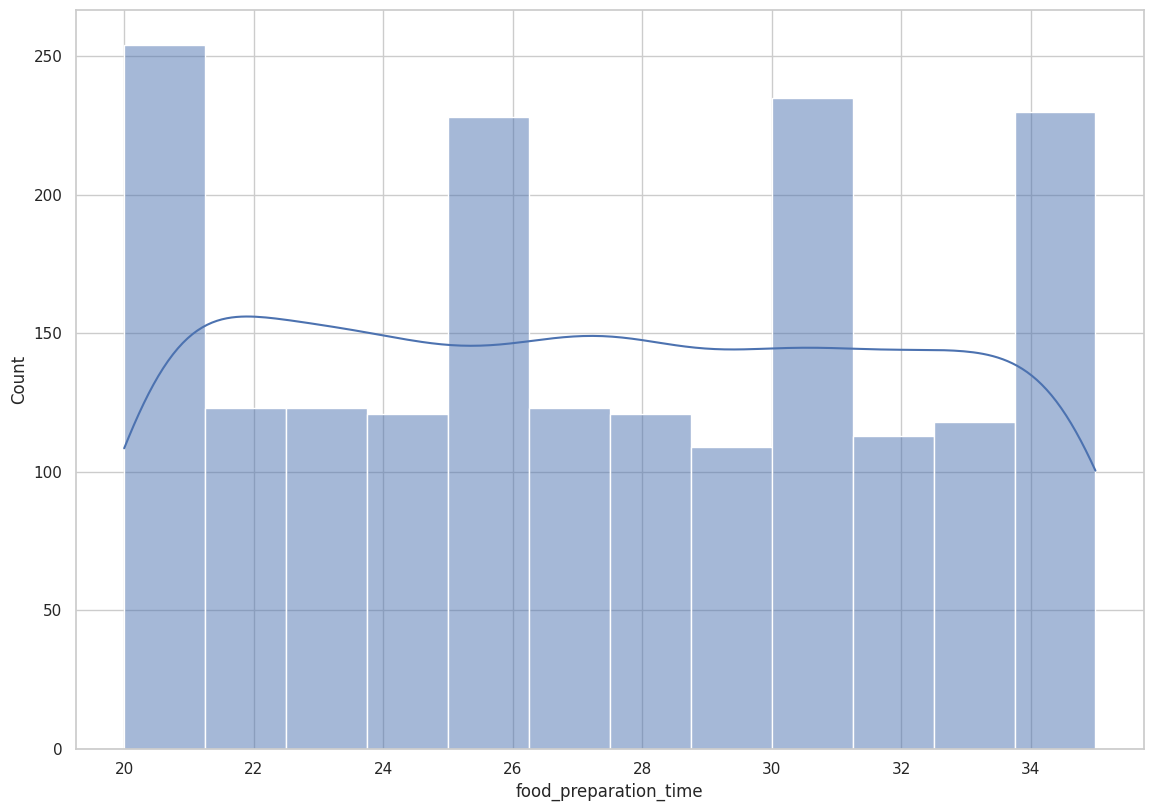

<Figure size 1170x827 with 0 Axes>

In [ ]:
# Let us start with a Histogram Plot on the food preperation time
sns.set_style("whitegrid")
sns.histplot(x=df['food_preparation_time'],kde = True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.tight_layout()
plt.show()
plt.savefig('food_preparation_time_hist.png');


####Observations:

Dont see a major trend in the prep time for the order

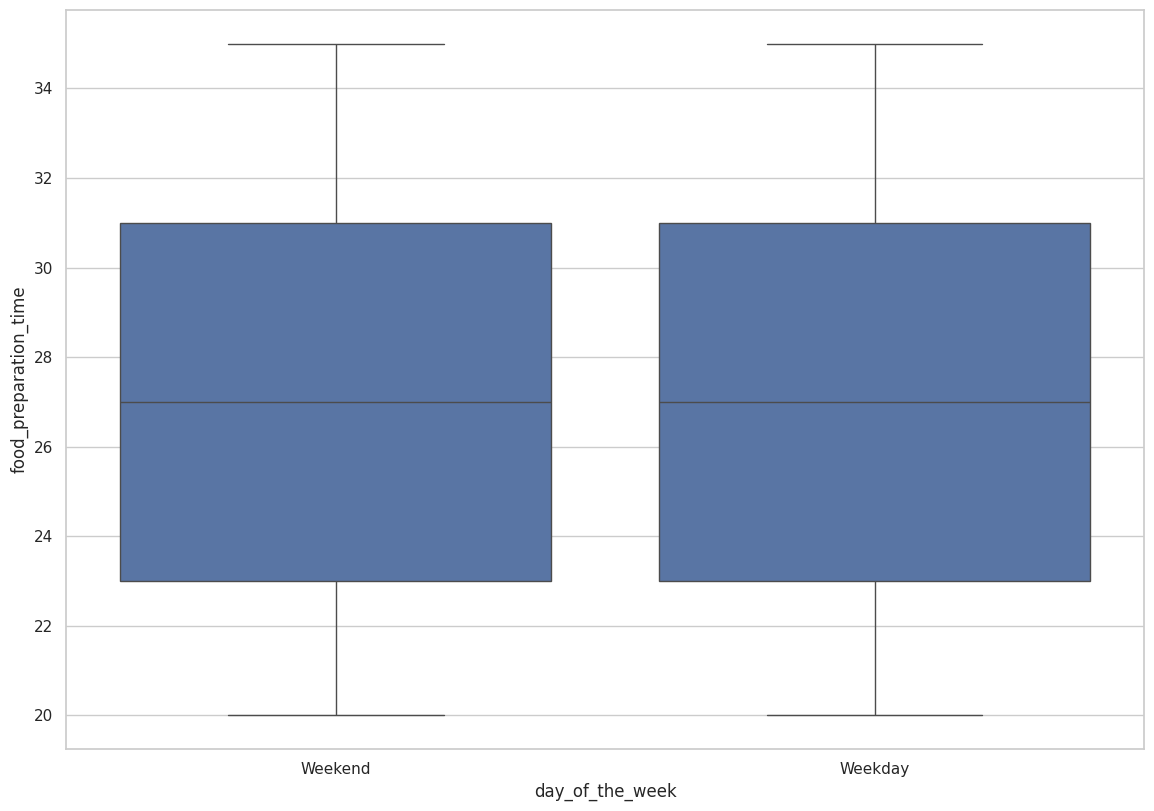

<Figure size 1170x827 with 0 Axes>

In [ ]:
# Let us do a box plot on food preperation time vs the day of the week
sns.set_style("whitegrid")
sns.boxplot(y=df['food_preparation_time'],x=df['day_of_the_week'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.tight_layout()
plt.show()
plt.savefig('food_preparation_time_box.png');

####Observations:

There is no marked difference in food prep time.  Median of the order prep time is around ~ 27 mins ,  minimum time is around ~ 20 mins and maximum time is around ~ 35 mins this seems to follow a normal distribution.
The average food preparation time falls at just about 27 minutes.
However, the distribution does not have a well defined bell curve as shown by the histogram


In [ ]:
#Calculate the Min , Max and Median food preperation time to validate our graphical observation for the histogram and box plot above
mid_food_prep_time = df.food_preparation_time.median()
min_food_prep_time = df.food_preparation_time.min()
max_food_prep_time = df.food_preparation_time.max()
print(f"Median Food prep time: {mid_food_prep_time}")
print(f"Minimum Food prep time : {min_food_prep_time}")
print(f"Maximum Food prep time : {max_food_prep_time}")

Median Food prep time: 27.0
Minimum Food prep time : 20
Maximum Food prep time : 35


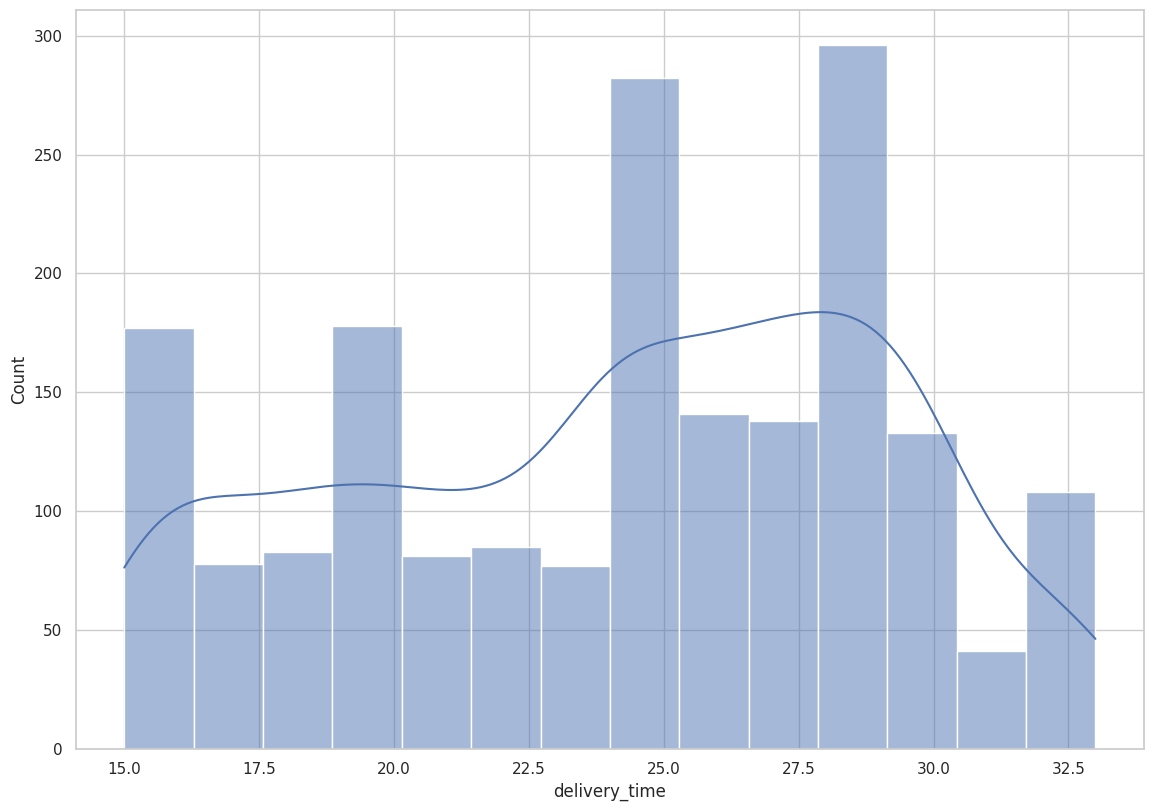

<Figure size 1170x827 with 0 Axes>

In [ ]:
# Let us start with a Histogram Plot on the order delivery time
sns.set_style("whitegrid")
sns.histplot(x=df['delivery_time'],kde = True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.tight_layout()
plt.show()
plt.savefig('delivery_time_hist.png');


####Observations:

Shows a bit of left skewed right , with delivery averaging arounf 27 mins

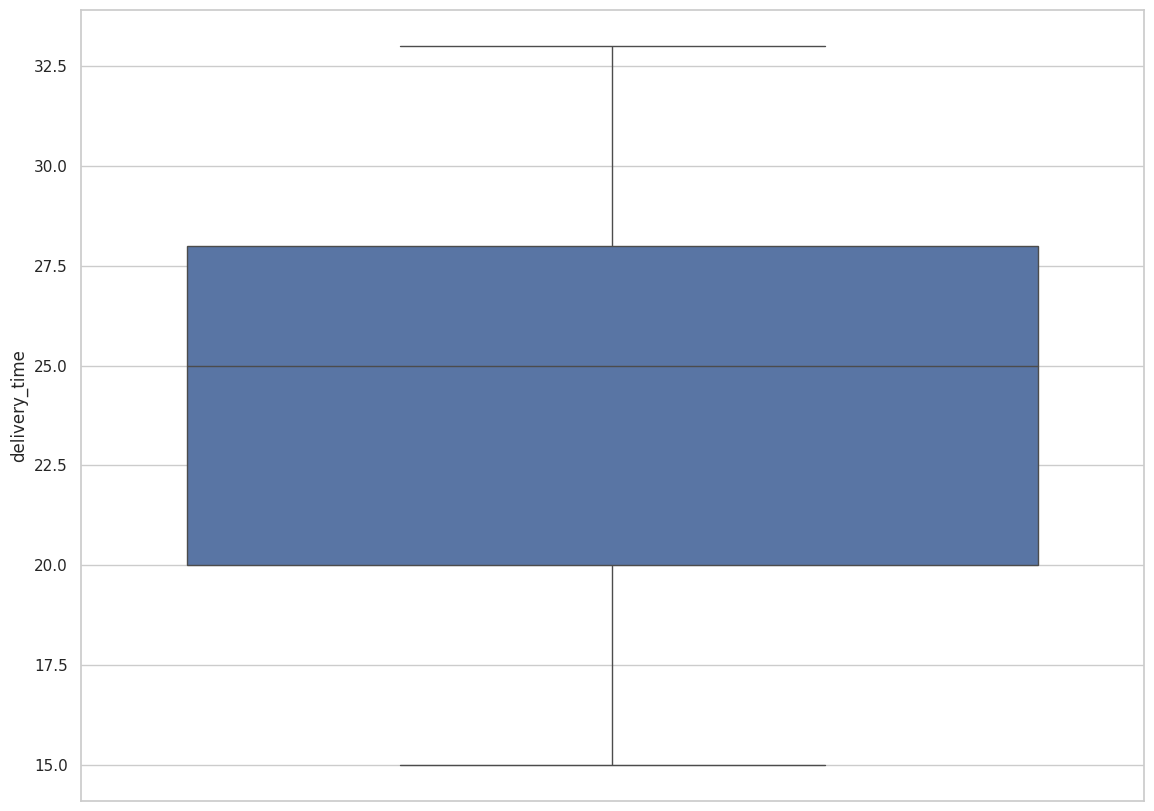

<Figure size 1070x627 with 0 Axes>

In [ ]:
# Let us do a box plot on food preperation time across all days of the week
sns.set_style("whitegrid")
sns.boxplot(y=df['delivery_time'])
sns.set(rc={'figure.figsize':(10.7,6.27)})
plt.tight_layout()
plt.show()
plt.savefig('delivery_time_box.png');

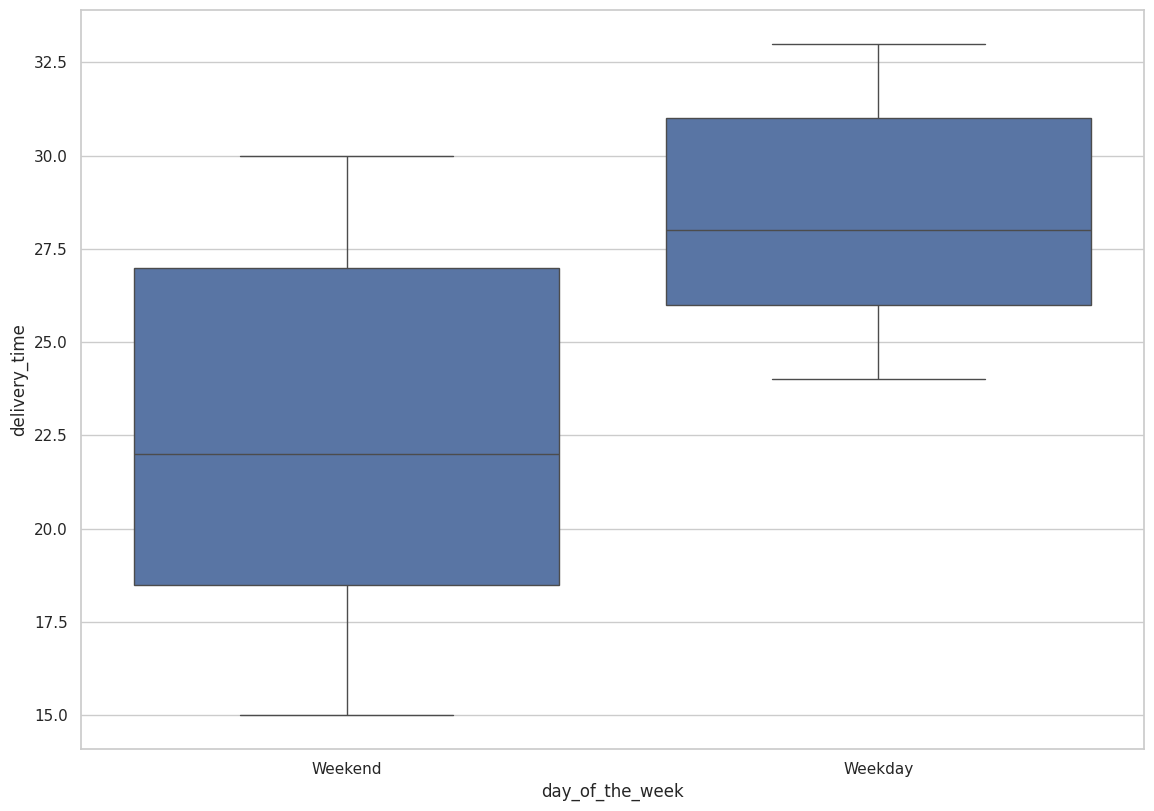

<Figure size 1170x827 with 0 Axes>

In [ ]:
# Let us do a box plot on food delivery  time vs the day of the week
sns.set_style("whitegrid")
sns.boxplot(y=df['delivery_time'],x=df['day_of_the_week'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.tight_layout()
plt.show()
plt.savefig('delivery_time_box.png');

####Observations:

In this e see some interesting observations

**Week Day Analysis **

1. Median weekday delivery time: 28.0
2. Minimum weekday delivery time: 24
3. Max weekday delivery time:33

**Week End Analysis**
1. Median weekend delivery time: 22.0
2. Minimum weekend delivery time: 15
3. Max weekend delivery time:30

It lakes longer times to delivery food on a weeek day than a weekend.

In [ ]:
#Calculate the Min , Max and Median food delivery time to validate our graphical observation for the histogram and box plot above
total_mid_delivery_time = df.delivery_time.median()
total_min_delivery_time = df.delivery_time.min()
total_max_delivery_time = df.delivery_time.max()
mid_delivery_time_weekday = df[df.day_of_the_week == 'Weekday']['delivery_time'].median()
min_delivery_time_weekday = df[df.day_of_the_week == 'Weekday']['delivery_time'].min()
max_delivery_time_weekday = df[df.day_of_the_week == 'Weekday']['delivery_time'].max()
mid_delivery_time_weekend = df[df.day_of_the_week == 'Weekend']['delivery_time'].median()
min_delivery_time_weekend = df[df.day_of_the_week == 'Weekend']['delivery_time'].min()
max_delivery_time_weekend = df[df.day_of_the_week == 'Weekend']['delivery_time'].max()
print(f"Median total delivery time: {total_mid_delivery_time}")
print(f"Minimum total delivery time : {total_min_delivery_time}")
print(f"Maximum total delivery time : {total_max_delivery_time}")
print(f"Median weekday delivery time: {mid_delivery_time_weekday}")
print(f"Minimum weekday delivery time: {min_delivery_time_weekday}")
print(f"Max weekday delivery time:{max_delivery_time_weekday}")
print(f"Median weekend delivery time: {mid_delivery_time_weekend}")
print(f"Minimum weekend delivery time: {min_delivery_time_weekend}")
print(f"Max weekend delivery time:{max_delivery_time_weekend}")

Median total delivery time: 25.0
Minimum total delivery time : 15
Maximum total delivery time : 33
Median weekday delivery time: 28.0
Minimum weekday delivery time: 24
Max weekday delivery time:33
Median weekend delivery time: 22.0
Minimum weekend delivery time: 15
Max weekend delivery time:30


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Use the groupby function on restaurent based on count of order id by value counts and set it to assending = false ( decending ) and filter to see the top 5 with head(5) function.
top_5_restarunts = df.groupby(['restaurant_name'])['order_id'].value_counts().groupby('restaurant_name').sum().to_frame().sort_values(by='order_id', ascending=False).head(5)
top_5_restarunts

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


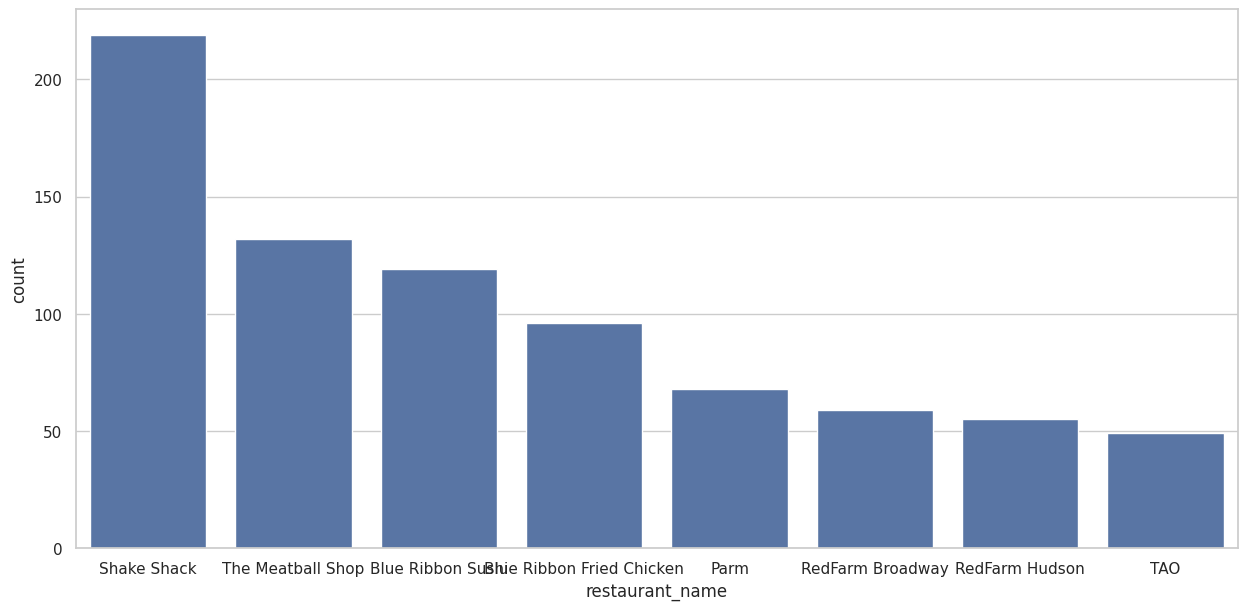

In [ ]:
plt.subplots(figsize = (15,7))
sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:8].index)
plt.savefig('top_restaurents_by_order_count.png');

#### Observations:

We see the top 5 restaurents by orders received are
1. Shake Shack
2. the Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fries Chicken
5. Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Use the comparision operator on data for 'weekend' on cuisine_type and set it to show by cuisine_type in decending order and filter the top 5 to get the most liked cuisine
most_popular_cuisine_weekends = df[df.day_of_the_week == 'Weekend']['cuisine_type'].value_counts().to_frame().sort_values(by ='cuisine_type', ascending=False).head(5)
most_popular_cuisine_weekends

,cuisine_type
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


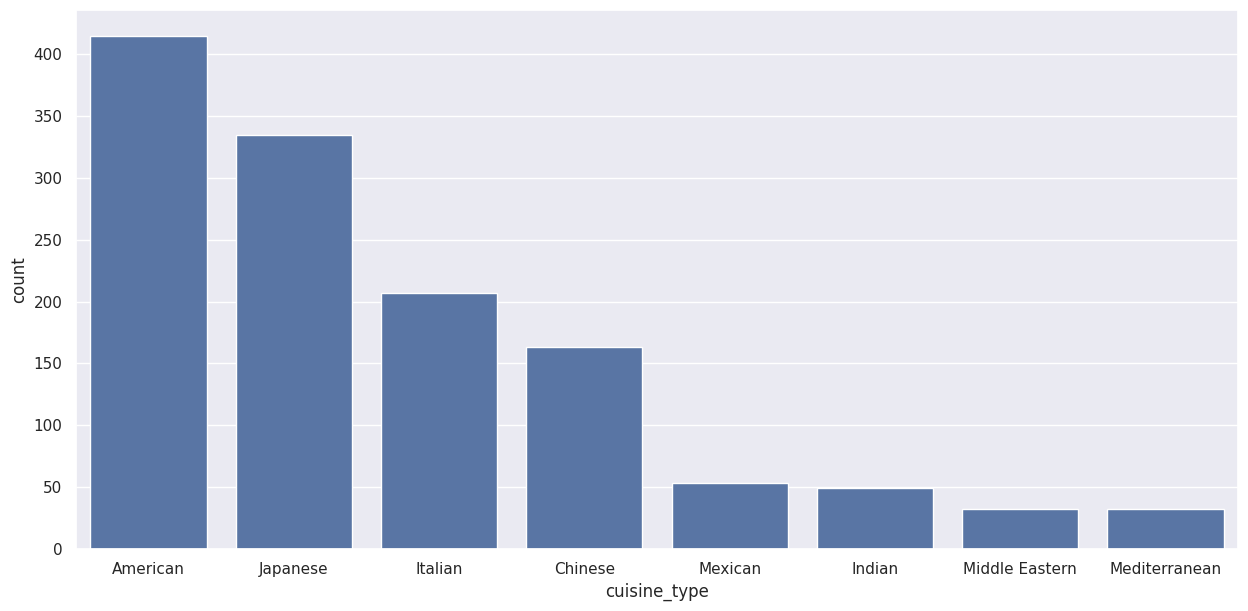

In [ ]:
plt.subplots(figsize = (15,7))
sns.countplot(data = df[df.day_of_the_week == 'Weekend'], x = 'cuisine_type',order = df.cuisine_type.value_counts().iloc[:8].index)
plt.savefig('top_cuisine_by_order_count.png');

#### Observations:

The Top cuisine liked by customers on a weekend is American followed by Japanese , Italian , Chinese , Mexican

### **Question 8 add on **: Which is the most popular cuisine all through the sampling days?

In [ ]:
# Use the groupby function on cuisine_type and total the order_id and sort this decending to got the all time liked cuisine type
most_popular_cuisine_all_week = df.groupby(['cuisine_type'])['order_id'].value_counts().groupby('cuisine_type').sum().to_frame().sort_values(by='order_id', ascending=False).head(5)
most_popular_cuisine_all_week

,order_id
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77


#### Observations:

The Top likes cuisine liked by customers all through the sampling days are American followed by Japanese , Italian , Chinese , Mexican

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
orders_costing_more_than_20 = df[df.cost_of_the_order > 20]['cost_of_the_order'].value_counts()
print(f"Number of orders costing more than $20: {orders_costing_more_than_20.sum()}")
percentge_orders_costing_more_than_20 = round((orders_costing_more_than_20.sum() / df['cost_of_the_order'].value_counts().sum()) * 100, 2)
print(f"Percentge of orders costing more than $20:", str(round(percentge_orders_costing_more_than_20)) + "%")

Number of orders costing more than $20: 555
Percentge of orders costing more than $20: 29%


#### Observations:

We see ~ 29% of the orders or 555 orders cost more than $20.00



### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
mean_order_delivery_time = df.delivery_time.mean()
print(f"Mean order Delivery time:" + str(round(mean_order_delivery_time)) + " Minutes")

Mean order Delivery time:24 Minutes


#### Observations:

We see that average time taken to deliver the order is 24 Minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Use the group by function to create a table with top 3 frequent customers
top_3_customers_id = df.groupby(['customer_id'])['order_id'].value_counts().groupby('customer_id').sum().to_frame().sort_values(by='order_id', ascending=False).head(3)
#top_3_customers_id
print(f"top three customers are" + str(top_3_customers_id.index.tolist()) + "and their number of orders are" + str(top_3_customers_id['order_id'].tolist())+ "respectively")
print(f"they always order" + str(df[df.customer_id.isin(top_3_customers_id.index.tolist())]['cuisine_type'].value_counts().to_frame().sort_values(by='cuisine_type', ascending=False).head(1  ).index.tolist()) + "cuisine")

top three customers are[52832, 47440, 83287]and their number of orders are[13, 10, 9]respectively
they always order['American']cuisine


#### Observations:

Customers with IDS 52832 , 47440 and 83287 who buy american cuisine are the most repeat customers worth contending for providing a 20% coupon for their loyality

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [ ]:
# Write the code here


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
#Drop 'Not Given' from the dataframe and create a new data framedf1 as this ranking does not meet our ctiteris
df1 = df.drop(df.index[(df['rating'] != '3') & (df['rating'] != '4') & (df['rating'] != '5')])
# Create a dataframe df3 of Restaurants with a consideration of mean rating greater than 4
df2 = df1[['restaurant_name','rating']][df1['rating']!= 0].groupby('restaurant_name').mean()> 4
#reset index to make sure that the merge works
df2.reset_index(inplace=True)
# Create a dataframe df3 of Restaurants with a consideration of rating count greater than 50
df3 = df1[['restaurant_name','rating']][df1['rating']!= 0].groupby('restaurant_name').count()> 50
# reset index to make sure the merge works
df3.reset_index(inplace=True)
#merge only those which meet the criteria and the rating == true and create a data frame df4
df4 = pd.merge(df3[df3['rating']== True], df2[df2['rating']== True],on ='restaurant_name')
# display the final data
df4

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:

The 4 restaurents which meet the criteria are
*   Blue Ribbon Fried Chicken
*   Blue Ribbon Sushi
*   ShakeShack
*   The Meetball Shop






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Let us do a new column to calculate the revnue of the company based on 25% fees for orders more than 20 dollars and 15% on orders more than 5 dollars
net_revenue = 0
for i in df['cost_of_the_order']:
    if (i > 20):
        net_revenue = net_revenue + (i*0.25)
    elif (5 < i < 20):
        net_revenue = net_revenue + (i*0.15)
    else:
        net_revenue = net_revenue + (i*0)
print('The net revenue on all orders is:', "{:.2f}".format(net_revenue))


The net revenue on all orders is: 6166.30


#### Observations:

Net revenue from all orders is  Dollor 6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Let us add a column to the dataframe called total time to deliver  =  food  preperation time + delivery time , then use this column to calculate what % of orders take more than 60 mins to deliver
df['total_time_to_deliver'] = df['food_preparation_time'] + df['delivery_time']
#df.total_time_to_deliver.describe() to check the colum is properly populated
number_of_delivery_more_than_60 = df[df.total_time_to_deliver > 60]['total_time_to_deliver'].value_counts()
print(f"Number of orders taking more than 60 minutes to deliver:" + str(number_of_delivery_more_than_60.sum()))
print(f"Percentage of orders taking more than 60 minutes to deliver:" + str(round((number_of_delivery_more_than_60.sum() / df['total_time_to_deliver'].value_counts().sum()) * 100, 2)) + "%")


Number of orders taking more than 60 minutes to deliver:200
Percentage of orders taking more than 60 minutes to deliver:10.54%


#### Observations:

so we see that ~ 10.54% of the orders or 245 orders take more than 60 mins to get delivered from the time the order is placed


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

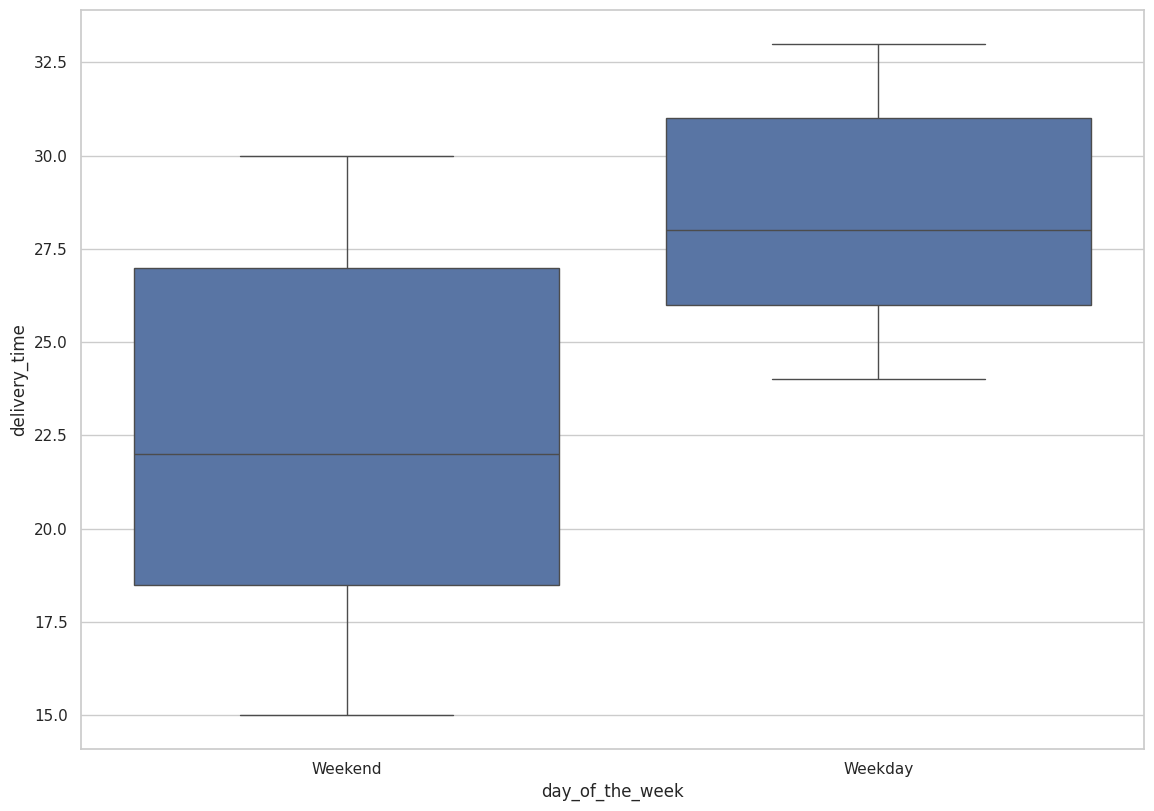

<Figure size 1170x827 with 0 Axes>

In [ ]:
# Let us do a box plot on food delivery time vs the day of the week
sns.set_style("whitegrid")
sns.boxplot(y=df['delivery_time'],x=df['day_of_the_week'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.tight_layout()
plt.show()
plt.savefig('delivery_time_box.png');

#### Observations:
In this e see some interesting observations

**Week Day Analysis **

1. Median weekday delivery time: 28.0
2. Minimum weekday delivery time: 24
3. Max weekday delivery time:33

**Week End Analysis**
1. Median weekend delivery time: 22.0
2. Minimum weekend delivery time: 15
3. Max weekend delivery time:30

It lakes longer times to delivery food on a weeek day than a weekend. We can also see that we have more orders in the weekend than during the week. Perhaps the restaurents staff more people in the qweekends

In [ ]:
#Calculate the Min , Max and Median food delivery time to validate our graphical observation above for the box plot above
total_mid_delivery_time = df.delivery_time.median()
total_min_delivery_time = df.delivery_time.min()
total_max_delivery_time = df.delivery_time.max()
mid_delivery_time_weekday = df[df.day_of_the_week == 'Weekday']['delivery_time'].median()
min_delivery_time_weekday = df[df.day_of_the_week == 'Weekday']['delivery_time'].min()
max_delivery_time_weekday = df[df.day_of_the_week == 'Weekday']['delivery_time'].max()
mid_delivery_time_weekend = df[df.day_of_the_week == 'Weekend']['delivery_time'].median()
min_delivery_time_weekend = df[df.day_of_the_week == 'Weekend']['delivery_time'].min()
max_delivery_time_weekend = df[df.day_of_the_week == 'Weekend']['delivery_time'].max()
print(f"Median total delivery time: {total_mid_delivery_time}")
print(f"Minimum total delivery time : {total_min_delivery_time}")
print(f"Maximum total delivery time : {total_max_delivery_time}")
print(f"Median weekday delivery time: {mid_delivery_time_weekday}")
print(f"Minimum weekday delivery time: {min_delivery_time_weekday}")
print(f"Max weekday delivery time:{max_delivery_time_weekday}")
print(f"Median weekend delivery time: {mid_delivery_time_weekend}")
print(f"Minimum weekend delivery time: {min_delivery_time_weekend}")
print(f"Max weekend delivery time:{max_delivery_time_weekend}")

Median total delivery time: 25.0
Minimum total delivery time : 15
Maximum total delivery time : 33
Median weekday delivery time: 28.0
Minimum weekday delivery time: 24
Max weekday delivery time:33
Median weekend delivery time: 22.0
Minimum weekend delivery time: 15
Max weekend delivery time:30


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  

### Recommendations:

*  

---